## **Logistic Regression (dataset: Breast Cancer)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
X = data.data
y = data.target

In [ ]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(20,input_dim=30,activation="relu"))
model.add(keras.layers.Dense(30,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))
sgd = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer =sgd, loss="binary_crossentropy", metrics=['binary_accuracy'])

fit = model.fit(X,y, batch_size=20, epochs=300,shuffle=False,verbose=1)


Epoch 1/300
29/29 [==============================] - 0s 1ms/step - loss: 810.4733 - binary_accuracy: 0.6591
Epoch 2/300
29/29 [==============================] - 0s 920us/step - loss: 0.6601 - binary_accuracy: 0.6274
Epoch 3/300
29/29 [==============================] - 0s 961us/step - loss: 0.6599 - binary_accuracy: 0.6274
Epoch 4/300
29/29 [==============================] - 0s 974us/step - loss: 0.6600 - binary_accuracy: 0.6274
Epoch 5/300
29/29 [==============================] - 0s 1ms/step - loss: 0.6601 - binary_accuracy: 0.6274
Epoch 6/300
29/29 [==============================] - 0s 1ms/step - loss: 0.6601 - binary_accuracy: 0.6274
Epoch 7/300
29/29 [==============================] - 0s 1ms/step - loss: 0.6602 - binary_accuracy: 0.6274
Epoch 8/300
29/29 [==============================] - 0s 949us/step - loss: 0.6603 - binary_accuracy: 0.6274
Epoch 9/300
29/29 [==============================] - 0s 1ms/step - loss: 0.6603 - binary_accuracy: 0.6274
Epoch 10/300
29/29 [================

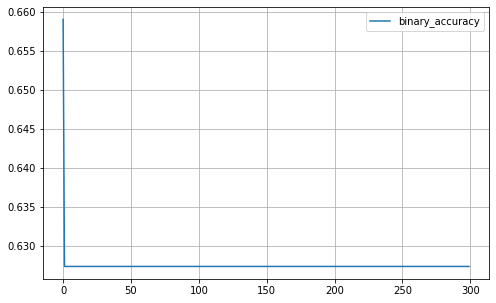

In [ ]:
history = pd.DataFrame(fit.history)
hist=history[['binary_accuracy']]
hist.plot(figsize=(8, 5))
plt.grid(True)

In [ ]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_13 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 31        
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


## **Multiple linear Regression (dataset:Auto MPG)**

In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t',
                          sep= " ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset=dataset.dropna()

In [ ]:
origin = dataset.pop('Origin')

In [ ]:
dataset['USA']= (origin==1)*1.0
dataset['Europe']= (origin==2)*1.0
dataset['Japan']= (origin==3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
train_set=dataset.sample(frac=0.8,random_state=0)
test_set=dataset.drop(train_set.index)

In [ ]:
train_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,28.0,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,22.3,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,12.0,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,38.0,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,33.8,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
281,19.8,6,200.0,85.0,2990.0,18.2,79,1.0,0.0,0.0
229,16.0,8,400.0,180.0,4220.0,11.1,77,1.0,0.0,0.0
150,26.0,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,1.0
145,32.0,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,1.0


In [ ]:
test_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
9,15.0,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,10.0,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,9.0,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
33,19.0,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395.0,18.0,82,1.0,0.0,0.0
375,36.0,4,105.0,74.0,1980.0,15.3,82,0.0,1.0,0.0
382,34.0,4,108.0,70.0,2245.0,16.9,82,0.0,0.0,1.0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0.0,0.0,1.0


In [ ]:
y_train = train_set.pop("MPG")
X_train = train_set

In [ ]:
X_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,4,90.0,75.0,2125.0,14.5,74,1.0,0.0,0.0
282,4,140.0,88.0,2890.0,17.3,79,1.0,0.0,0.0
69,8,350.0,160.0,4456.0,13.5,72,1.0,0.0,0.0
378,4,105.0,63.0,2125.0,14.7,82,1.0,0.0,0.0
331,4,97.0,67.0,2145.0,18.0,80,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,1.0,0.0,0.0
229,8,400.0,180.0,4220.0,11.1,77,1.0,0.0,0.0
150,4,108.0,93.0,2391.0,15.5,74,0.0,0.0,1.0
145,4,83.0,61.0,2003.0,19.0,74,0.0,0.0,1.0


In [ ]:
y_train

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [ ]:
y_test= test_set.pop("MPG")
X_test= test_set

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(64,input_dim=9, activation='linear'))
opt = keras.optimizers.Adam(lr=0.004)
model.compile(optimizer=opt, loss='mse', metrics=['mse','mae'])

fit = model.fit(X_train,y_train, batch_size=1, epochs=50, validation_split=0.2, shuffle=False,verbose=1)

Epoch 1/50
251/251 [==============================] - 0s 2ms/step - loss: 21605.0156 - mse: 21605.0156 - mae: 61.7879 - val_loss: 293.3310 - val_mse: 293.3310 - val_mae: 13.2844
Epoch 2/50
251/251 [==============================] - 0s 1ms/step - loss: 237.4100 - mse: 237.4100 - mae: 11.7122 - val_loss: 225.8088 - val_mse: 225.8088 - val_mae: 11.3410
Epoch 3/50
251/251 [==============================] - 0s 1ms/step - loss: 185.3417 - mse: 185.3417 - mae: 10.1753 - val_loss: 174.7241 - val_mse: 174.7241 - val_mae: 9.7007
Epoch 4/50
251/251 [==============================] - 0s 1ms/step - loss: 146.6224 - mse: 146.6224 - mae: 8.8931 - val_loss: 136.7078 - val_mse: 136.7078 - val_mae: 8.3970
Epoch 5/50
251/251 [==============================] - 0s 1ms/step - loss: 118.4598 - mse: 118.4598 - mae: 7.8904 - val_loss: 107.6600 - val_mse: 107.6600 - val_mae: 7.3684
Epoch 6/50
251/251 [==============================] - 0s 1ms/step - loss: 97.9217 - mse: 97.9217 - mae: 7.1275 - val_loss: 85.4660 

In [ ]:
fit.history

{'loss': [21605.015625,
  237.41001892089844,
  185.34169006347656,
  146.6224365234375,
  118.45980834960938,
  97.9216537475586,
  82.7345962524414,
  71.2468490600586,
  62.332603454589844,
  55.184146881103516,
  49.270694732666016,
  44.33051681518555,
  40.25929260253906,
  36.93821716308594,
  34.22831344604492,
  31.99907684326172,
  30.16597557067871,
  28.708080291748047,
  27.628385543823242,
  26.888273239135742,
  26.42155647277832,
  26.175888061523438,
  26.13389015197754,
  26.289995193481445,
  26.569692611694336,
  26.849489212036133,
  27.026607513427734,
  27.05902099609375,
  26.949363708496094,
  26.724594116210938,
  26.428590774536133,
  26.101682662963867,
  25.771549224853516,
  25.455629348754883,
  25.16438865661621,
  24.903444290161133,
  24.67514419555664,
  24.4797306060791,
  24.315776824951172,
  24.180391311645508,
  24.06951904296875,
  23.978689193725586,
  23.90361976623535,
  23.84083366394043,
  23.787662506103516,
  23.74222755432129,
  23.70318

In [ ]:
history=pd.DataFrame(fit.history)
history

,loss,mse,mae,val_loss,val_mse,val_mae
0,21605.015625,21605.015625,61.787945,293.331024,293.331024,13.284352
1,237.410019,237.410019,11.712165,225.808823,225.808823,11.340986
2,185.341690,185.341690,10.175259,174.724136,174.724136,9.700732
3,146.622437,146.622437,8.893068,136.707840,136.707840,8.396980
4,118.459808,118.459808,7.890378,107.659973,107.659973,7.368425
5,97.921654,97.921654,7.127479,85.466003,85.466003,6.547630
6,82.734596,82.734596,6.539135,69.041794,69.041794,5.871452
7,71.246849,71.246849,6.074710,57.328117,57.328117,5.349863
8,62.332603,62.332603,5.705430,48.988003,48.988003,4.952233
9,55.184147,55.184147,5.400864,42.804657,42.804657,4.632380


In [ ]:
hist=history[['mse','val_mse']]
hist

,mse,val_mse
0,21605.015625,293.331024
1,237.410019,225.808823
2,185.341690,174.724136
3,146.622437,136.707840
4,118.459808,107.659973
5,97.921654,85.466003
6,82.734596,69.041794
7,71.246849,57.328117
8,62.332603,48.988003
9,55.184147,42.804657


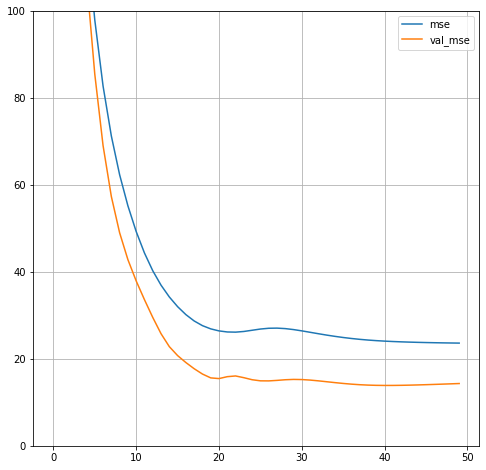

In [ ]:
hist.plot(figsize=(8, 8),ylim=(0,100))

plt.grid(True) 

In [ ]:
model.predict(X_test)

array([[16.652714 , 15.604541 , 16.279829 , ..., 16.339037 , 17.01577  ,
        16.313301 ],
       [ 9.872026 , 10.1433325,  9.792381 , ...,  9.867913 ,  9.672445 ,
         9.886536 ],
       [ 8.852581 ,  9.854329 ,  8.639505 , ...,  8.9145   ,  8.207647 ,
         8.915213 ],
       ...,
       [34.85176  , 34.128872 , 34.608578 , ..., 34.70681  , 35.076233 ,
        34.641617 ],
       [36.558372 , 35.685017 , 36.14996  , ..., 36.301476 , 36.781807 ,
        36.25176  ],
       [30.206968 , 30.012606 , 30.139685 , ..., 29.995497 , 30.261536 ,
        30.165617 ]], dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 15.1627 - mse: 15.1627 - mae: 3.0973


[15.162694931030273, 15.162694931030273, 3.0972862243652344]

## **Intel Image Classification**

In [5]:
!unzip "/content/drive/My Drive/dataset/intel_image_classification.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: intel_image_classification/seg_train/mountain/7551.jpg  
  inflating: intel_image_classification/seg_train/mountain/7560.jpg  
  inflating: intel_image_classification/seg_train/mountain/7565.jpg  
  inflating: intel_image_classification/seg_train/mountain/7578.jpg  
  inflating: intel_image_classification/seg_train/mountain/7581.jpg  
  inflating: intel_image_classification/seg_train/mountain/7586.jpg  
  inflating: intel_image_classification/seg_train/mountain/7647.jpg  
  inflating: intel_image_classification/seg_train/mountain/7652.jpg  
  inflating: intel_image_classification/seg_train/mountain/7654.jpg  
  inflating: intel_image_classification/seg_train/mountain/7662.jpg  
  inflating: intel_image_classification/seg_train/mountain/767.jpg  
  inflating: intel_image_classification/seg_train/mountain/7672.jpg  
  inflating: intel_image_classification/seg_train/mountain/7679.jpg  
  inflating: intel_image_classification/seg_train/mount

In [24]:
import os
import sys
import glob
import random
import warnings
import itertools
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree
import keras
import tensorflow as tf
from keras import models,layers,optimizers

In [6]:
path = r"/content/intel_image_classification/"
trainFileList = os.listdir(path+"seg_train")
testFileList = os.listdir(path+"seg_test")

In [7]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1234) #Shuffle the dataset you just prepared.

In [8]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [9]:
Images, Labels = get_images('/content/intel_image_classification/seg_train/') #Extract the training images from the folders.

X_train = np.array(Images) #converting the list of images to numpy array.
y_train = np.array(Labels)

In [10]:
Images, Labels = get_images('/content/intel_image_classification/seg_test/') #Extract the training images from the folders.

X_test = np.array(Images) #converting the list of images to numpy array.
y_test = np.array(Labels)

In [11]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=0)

In [12]:
X_train = X_train.reshape(X_train.shape[0],150,150,3)
X_valid = X_valid.reshape(X_valid.shape[0],150,150,3)
X_test = X_test.reshape(X_test.shape[0],150,150,3)

# 데이터 포맷 바꾸기
# 정수(int)인 데이터에서 실수(float)으로 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[150,150,3]))
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1024,activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(6,activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              69121024  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizers.RMSprop(lr=0.2), metrics=["accuracy"])

In [51]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
351/351 [==============================] - 235s 669ms/step - loss: 936.3734 - accuracy: 0.1622 - val_loss: 7808.4268 - val_accuracy: 0.1649
Epoch 2/30
351/351 [==============================] - 236s 672ms/step - loss: 1.8132 - accuracy: 0.1659 - val_loss: 7808.4277 - val_accuracy: 0.1657
Epoch 3/30
351/351 [==============================] - 238s 677ms/step - loss: 1.8128 - accuracy: 0.1615 - val_loss: 7808.4062 - val_accuracy: 0.1831
Epoch 4/30
351/351 [==============================] - 238s 678ms/step - loss: 182.9437 - accuracy: 0.1691 - val_loss: 8762.7920 - val_accuracy: 0.1596
Epoch 5/30
351/351 [==============================] - 236s 672ms/step - loss: 1.8123 - accuracy: 0.1711 - val_loss: 8762.7949 - val_accuracy: 0.1657
Epoch 6/30
351/351 [==============================] - 237s 675ms/step - loss: 1.8119 - accuracy: 0.1721 - val_loss: 8762.8320 - val_accuracy: 0.1596
Epoch 7/30
351/351 [==============================] - 236s 672ms/step - loss: 1.8129 - accuracy: 0.165

#### 아마 데이터 양이 많아서 정확도가 처참한 것 같은데, 이후에 Convolution layer, batch normalization 등등을 배우고 나서 이것까지 함께 적용해야지 성능이 향상될 거 같습니다... ㅎㅎ